In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Define sample size
n = 50

# Generate profits before and after promotion for control and treatment groups
control_pre = np.random.normal(100, 10, n).astype(int)
treatment_pre = np.random.normal(100, 10, n).astype(int)
control_post = np.random.normal(105, 10, n).astype(int)
treatment_post = np.random.normal(105, 10, n).astype(int)

# Apply the promotion effect to the treatment group after promotion
promotion_effect = 20
treatment_post += promotion_effect

# Create DataFrame
data = pd.DataFrame({
    "product_id": np.arange(n * 2),
    "treatment": np.repeat([0, 1], n),  # 0 = Control, 1 = Treatment
    "pre_promotion_profit": np.concatenate([control_pre, treatment_pre]),
    "post_promotion_profit": np.concatenate([control_post, treatment_post])
})

# Calculate profit difference (Post - Pre) for each store
data["profit_change"] = ((data["post_promotion_profit"] - data["pre_promotion_profit"]) / data["pre_promotion_profit"]) * 100

data.head()

,product_id,treatment,pre_promotion_profit,post_promotion_profit,profit_change
0,0,0,104,90,-13.461538
1,1,0,98,100,2.040816
2,2,0,106,101,-4.716981
3,3,0,115,96,-16.521739
4,4,0,97,103,6.185567


In [3]:
# Run Difference-in-Differences regression directly on profit change
model = smf.ols("profit_change ~ treatment", data=data).fit()

print("\nModel Summary:")
print(model.summary())



Model Summary:
                            OLS Regression Results                            
Dep. Variable:          profit_change   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     31.81
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           1.65e-07
Time:                        12:24:03   Log-Likelihood:                -421.84
No. Observations:                 100   AIC:                             847.7
Df Residuals:                      98   BIC:                             852.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2053      2.348    

C:\Users\gokcem.yigit\AppData\Local\Temp\ipykernel_29488\1548722528.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="treatment", y="profit_change", data=data, palette=["blue", "orange"])


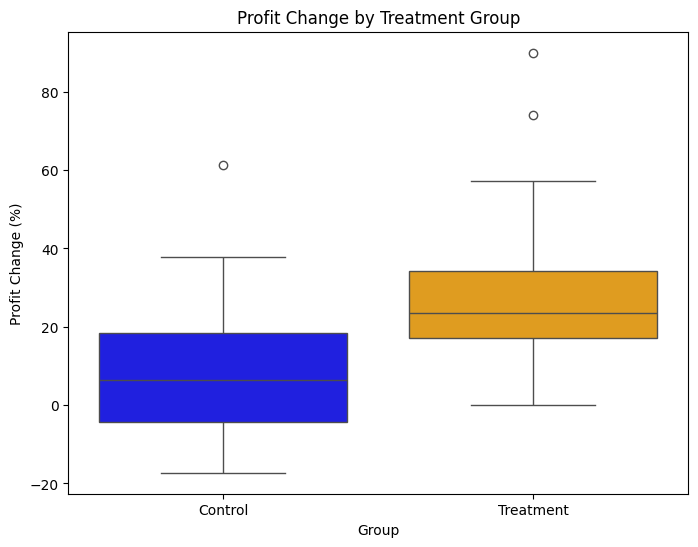

In [4]:
# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="treatment", y="profit_change", data=data, palette=["blue", "orange"])

plt.xticks(ticks=[0, 1], labels=["Control", "Treatment"])
plt.xlabel("Group")
plt.ylabel("Profit Change (%)")
plt.title("Profit Change by Treatment Group")

plt.show()
